# 4. 옵티마이저 사용하기

- https://codetorial.net/tensorflow/basics_of_optimizer.html

옵티마이저 (Optimizer)는 손실 함수을 통해 얻은 손실값으로부터 모델을 업데이트하는 방식을 의미합니다.

TensorFlow는 SGD, Adam, RMSprop과 같은 다양한 종류의 옵티마이저를 제공합니다.

- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

# 1) Neural Network 구성하기

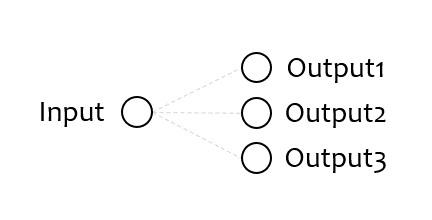

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import numpy as np

tf.random.set_seed(0)
model = Sequential([Dense(units = 3, input_shape=[1])])

이번에는 tf.random 모듈의 set_seed()함수를 사용해서 랜덤 시드를 설정했습니다.

tf.keras 모듈의 Sequential 클래스는 Neural Network의 각 층을 순서대로 쌓을 수 있도록 합니다.

# 2) Neural Network 컴파일하기

구성한 모델의 손실함수와 옵티마이저를 지정하기 위해 compile()메서드를 사용합니다.

In [5]:
model.compile(loss='mse', optimizer='SGD')

\손실 함수로 mse, 옵티마이저로 SGD를 지정했습니다.

SGD는 Stochastic Gradient Descent의 줄임말이며, 우리말로는 확률적 경사하강법이라고 부릅니다.

# 3) Neural Network 훈련하기

fit() 메서드는 컴파일 과정에서 지정한 손실 함수와 옵티마이저를 사용해서 모델을 훈련합니다.

In [8]:
model.fit([1], [[0,1,0]], epochs=1)
model.evaluate([1], [[0,1,0]])

fit()메서드는 훈련 진행 상황과 현재의 손실값을 반환합니다.

1회의 에포크(epoch)이후, evaluate()메서드를 사용해서 손실값을 확인해보면

손실값이 epoch 1의 손실값보다 감소했음을 알 수 있습니다.

In [9]:
history = model.fit([1], [[0,1,0]], epochs = 100)

에포크를 100회로 지정하면

100회 훈련과정의 훈련시간과 손실값이 출력됩니다.

# 4) 손실값 시각화하기

- https://codetorial.net/matplotlib/index.html

In [29]:
plt.rcParams

matplotlib은 그래프를 그리기 위해서 Runtime Configuration Parameters, 줄여서 rcParams라는 딕셔너리의 값을 이용해서 그립니다.

rcParams 딕셔너리의 값을 바꿔주면, backend 에서 그릴 때, 다른 방식으로 그리게 됩니다.

그래프의 폰트 사이즈, 크기, 바탕색 등 여러가지 성질들이 모두 matplotlib.rcParams 딕셔너리에 담겨있습니다

In [31]:
plt.style.available

In [ ]:
plt.style.use('default') # 기본
plt.style.use('bmh') # bmh 스타일시트
plt.style.use('dark_background ') # dark_background  스타일시트

matplotlib.pyplot.style.available을 입력하면

matplotlib에서 사용할 수 있는 스타일 시트 목록이 출력된다.

plt.style.use('스타일시트') 코드의 '스타일시트'에 본인이 사용하고 싶은 스타일 시트 이름을 넣으면 스타일 시트가 변경된다.

In [28]:
import matplotlib.pyplot as plt

plt.style.use('default')
#plt.figure(figsize = (12,5))
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['font.size'] = 12

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

fit() 메서드는 History 객체를 반환합니다.

History 객체의 history 속성은 훈련 과정의 손실값(loss values)과 지표(metrics)를 포함합니다.

컴파일 과정에서 지표를 지정하지 않았기 때문에 이 예제의 history 속성은 지표(metrics)를 포함하지 않습니다.

훈련 과정의 손실값을 Matplotlib을 이용해서 그래프로 나타내면 감소하는 경향을 확인할 수 있습니다.

# 5) 출력값 시각화하기

In [45]:
for i in range(1, 11):
    print(i)

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)

model = Sequential([Dense(units = 3, input_shape=[1], use_bias = False)])
model.compile(loss = 'mse', metrics = ['acc'], optimizer='SGD')
pred = model.predict([1])
print(pred)
print(model.get_weights()) # 모델의 가중치 값을 가져옴

plt.bar(np.arange(3), pred[0])
plt.ylim(-1.1,1.1)
plt.xlabel('Output Node')
plt.ylabel('Output')
plt.text(-0.4, 0.8, 'Epoch 0')
plt.tight_layout()
plt.show()
#plt.savefig('./plt/pred00.png')
#plt.clf()

epochs = 500
for i in range(1, epochs + 1):
    model.fit([1], [[0,1,0]], epochs = 1, verbose=0)
    pred = model.predict([1])
    
    if i % 25 == 0:
        plt.bar(np.arange(3), pred[0])
        plt.ylim(-1.1,1.1)
        plt.xlabel('Output Node')
        plt.ylabel('Ouput')
        plt.text(-0.4, 0.8, 'Epoch' + str(i))
        plt.tight_layout()
        plt.show()
        
print(pred)
print(model.get_weights())

In [51]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)
model1 = Sequential([Dense(units = 3, input_shape = [1], use_bias = False)])

tf.random.set_seed(0)
model2 = tf.keras.models.clone_model(model1)

tf.random.set_seed(0)
model3 = tf.keras.models.clone_model(model1)

model1.compile(loss = 'mse', metrics = ['acc'], optimizer = 'SGD')
model2.compile(loss = 'mse', metrics = ['acc'], optimizer = 'Adam')
model3.compile(loss = 'mse', metrics = ['acc'], optimizer = 'RMSprop')

history1 = model1.fit([1], [[0,1,0]], epochs = 10, verbose = 0)
history2 = model2.fit([1], [[0,1,0]], epochs = 10, verbose = 0)
history3 = model3.fit([1], [[0,1,0]], epochs = 10, verbose = 0)

loss1 = history1.history['loss']
loss2 = history2.history['loss']
loss3 = history3.history['loss']

plt.plot(loss1, label='SGD')
plt.plot(loss2, label='Adam')
plt.plot(loss3, label='RMSprop')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.legend(loc = 'upper right')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

우선 세 개의 모델이 동일한 가중치 값을 갖도록 하기 위해 set_seed()함수를 세번 호출했습니다.

compile()메서드에 각각 다른 옵티마이저를 지정합니다.

10회 훈련 과정의 손싥값을 시각화하면 위와 같습니다.

옵티마이저에 따라 모델을 업데이트하는 방식과 손실값이 감소하는 경향에 차이가 있음을 알 수 있습니다.